Sep 16 Yang et al. catalog

- test other algorithm to find the fastest way doing sum up;

- plot M_h vs N_GC;


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table

In [4]:
import astropy.io.fits as fits

In [5]:
path='/data/lemn/DESIdata/'

In [6]:
#load data after applied the model on Yang
data2 = fits.getdata('/data/lemn/results/M_z_NGCs_Yangcat.fits')
M_z = data2['M_z']
N_GC = data2['NGCs']

(array([3.0000000e+01, 2.9100000e+02, 6.3732700e+05, 2.7722004e+07,
        3.2854233e+07, 5.3468590e+06, 6.0618900e+05, 2.8115000e+04,
        2.4530000e+03, 9.9000000e+01]),
 array([-28.21651 , -26.397512, -24.578514, -22.759516, -20.940518,
        -19.12152 , -17.302522, -15.483524, -13.664526, -11.845528,
        -10.02653 ]),
 <BarContainer object of 10 artists>)

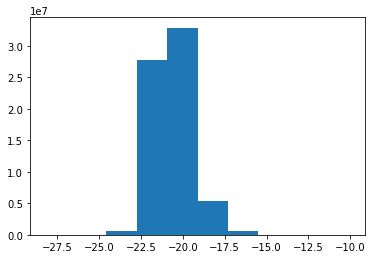

In [7]:
plt.hist(M_z)

Text(0, 0.5, 'N_GC')

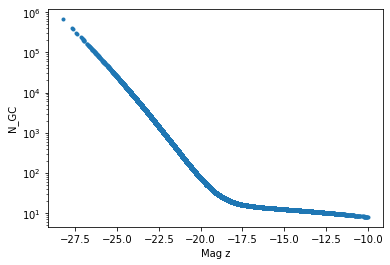

In [37]:
plt.yscale('log')
plt.plot(M_z, N_GC, '.')
plt.xlabel('Mag z')
plt.ylabel('N_GC')

In [38]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [39]:
igroup_ID = mem['groupID']

In [40]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [41]:
M_group = group['log M_h [M_sun/h]'] #[M_sun/h]

In [42]:
h = 0.7                    #Planck parameters
M_group = 10**(M_group)*h  # [M_sun], unit in catalog is log10 Msun

In [43]:
group_ID = group['groupID'] #group ID correspond to M_group

- find galaxies in the same group;

- sum up their GCs and plot M_h of group vs. #GCs.

In [44]:
#create array to save #GCs in groups
N_GC_group = np.zeros(len(group_ID))

In [ ]:
#load data from 1st algorithm
data_save = fits.getdata('/data/lemn/results/M_h_NGCs.fits')
N_save = data_save['NGCs']
M_save = data_save['M_h M_sun']

In [108]:
import time
t0 = time.time()

In [109]:
for i in range(120000,130000):
    a = np.argwhere(igroup_ID == group_ID[i])
    for j in a:
        N_GC_group[i] += N_GC[j]
    igroup_ID = np.delete(igroup_ID, a)
    N_GC      = np.delete(N_GC, a)
    #print(len(igroup_ID))

In [110]:
t1 = time.time()
print('running time', t1-t0)

running time 7309.3084926605225


Running time (unit [s]):

(0,1000):                      766.4202146530151 
(1000,5000):                  3059.4419074058533 
(5000,10.000):                3789.9600677490234 
(10.000,20.000):              7581.686842679977  
(20.000,100.000):           118082.42201137543   
(100.000,100.100):              74.03855991363525
(100.100,101.000):             661.8937373161316
(101.000,105.000):            2937.6755962371826
(105.000,110.000):            3683.331767320633
(110.000,120.000):            7326.526811599731
(120.000,130.000):            7309.3084926605225
(130.000,150.000):
(150.000,200.000):
(200.000,500.000):
(500.000,1.000.000):
(1.000.000,5.000.000):
(5.000.000,10.000.000):
(10.000.000,20.000.000):
(20.000.000,30.000.000):
(30.000.000,len(group_ID)):

In [111]:
#save number of GCs of groups
T = Table([M_group,N_GC_group],names=['M_h M_sun','NGCs'])
T.write('/data/lemn/results/M_h_NGCs_test2.fits', overwrite=True)

In [112]:
#save number of GCs of each remaining gal.
T2 = Table([igroup_ID, N_GC],names=['igroup', 'NGCs each gal'])
T2.write('/data/lemn/results/list_NGCs_test2.fits', overwrite=True)

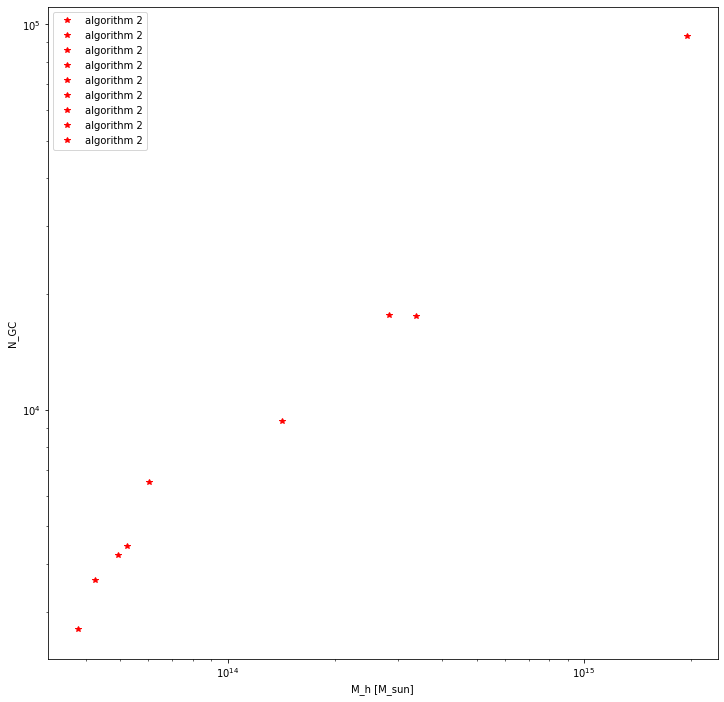

In [100]:
plt.figure(figsize=(12,12))
i_plot = [0,100,500,1000,5000,10000,15000,100000,120000]
for i in i_plot:
    plt.plot(M_group[i], N_GC_group[i],'r*', alpha = 1 )#,label='algorithm 2') #remove after counted group
#plt.plot(M_save, N_save,'b.', alpha = 0.1, label='algorithm 1') #run for-for loops
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M_h [M_sun]')
plt.ylabel('N_GC')
plt.legend()

In [118]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [119]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [114]:
#load Forbes 18 data
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [116]:
#load blue GCs from Creasey data
M_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(0))
N_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(1))

In [120]:
Atlas_H = fits.getdata('/data/lemn/results/M_h_NGCs_Harris-Atlas.fits')

In [121]:
check     = Atlas_H['check T F central']
sum_NGC   = Atlas_H['NGCs']
M_h_array = Atlas_H['M_h M_sun']

In [ ]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey, 'k.', label ='Creasey data')

i_plot = [0,100,500,1000,5000,10000,15000,100000,120000]
for i in i_plot:
    plt.plot(M_group[i], N_GC_group[i],'r*', alpha = 1 )
#plt.plot(M_group, N_GC_group,'*', alpha = 0.05, label='Yang group data')

for i in range(0,len(check)):
    if check[i] == 1:
        plt.plot(M_h_array[i],sum_NGC[i], 'bo')#, label = '#GCs in halos, true cen')

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()#loc=(1.1,0))
#plt.savefig('tot_GC2.pdf')
plt.show()